### Collecting data

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import math

In [120]:
df=sns.load_dataset('titanic')

In [121]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [122]:
print('# of passengers in orginal data: ' +str(len(df.index)))

# of passengers in orginal data: 891


### Analyzing data

<AxesSubplot:xlabel='survived', ylabel='count'>

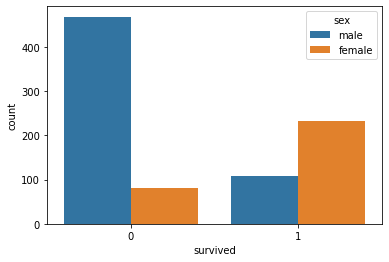

In [123]:
sns.countplot(x='survived',hue='sex', data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

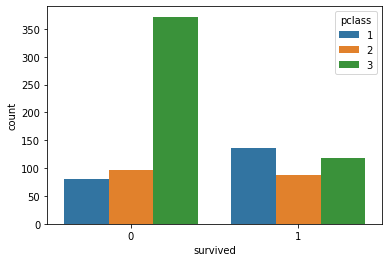

In [124]:
sns.countplot(x='survived',hue='pclass', data=df)

<AxesSubplot:ylabel='Frequency'>

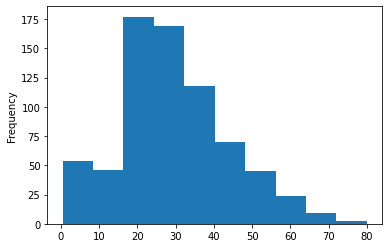

In [125]:
df['age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

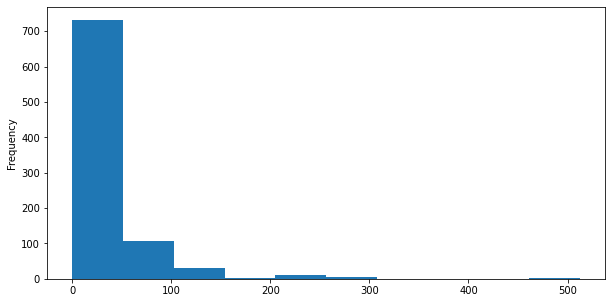

In [126]:
df['fare'].plot.hist(bins=10, figsize=(10,5))

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


<AxesSubplot:xlabel='sibsp', ylabel='count'>

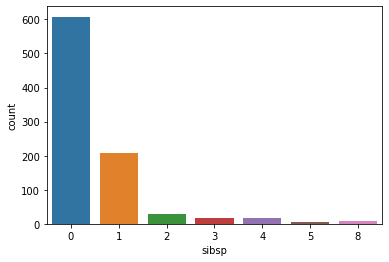

In [128]:
sns.countplot(x='sibsp', data=df)

### Data Wrangling

In [129]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

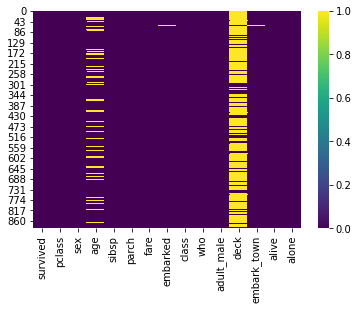

In [130]:
sns.heatmap(df.isnull(), cmap='viridis')

<AxesSubplot:xlabel='pclass', ylabel='age'>

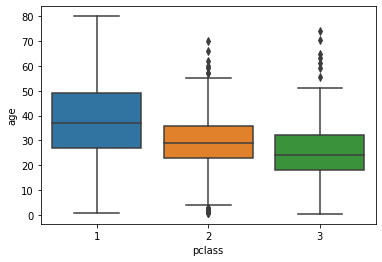

In [131]:
sns.boxplot(x='pclass', y='age', data=df)

In [132]:
df.drop('deck', axis=1, inplace=True)

In [133]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [134]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [135]:
df.dropna(inplace=True)

<AxesSubplot:>

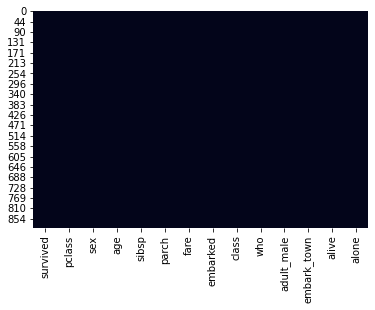

In [136]:
sns.heatmap(df.isnull(), cbar=False)

In [137]:
df.shape

(712, 14)

In [138]:
sex=pd.get_dummies(df['sex'])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [139]:
embarked=pd.get_dummies(df['embarked'])
embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [140]:
pclass=pd.get_dummies(df['pclass'])
pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [141]:
df=pd.concat([df,sex,embarked,pclass],axis=1)

In [142]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alive,alone,female,male,C,Q,S,1,2,3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,no,False,0,1,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,yes,False,1,0,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,yes,True,1,0,0,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,yes,False,1,0,0,0,1,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,no,True,0,1,0,0,1,0,0,1


In [143]:
df.drop(['sex','embarked','class','who','alive','alone'],axis=1,inplace=True)

In [145]:
df.drop(['adult_male','embark_town'],axis=1,inplace=True)

In [147]:
df.drop(['pclass'],axis=1,inplace=True)

In [148]:
df.head()

,survived,age,sibsp,parch,fare,female,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


### Train and Test data

In [149]:
X=df.drop('survived',axis=1)
y=df['survived']

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
logmodel=LogisticRegression()

In [155]:
logmodel.fit(X_train,y_train)

c:\users\aytan\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [156]:
predictions=logmodel.predict(X_test)

In [158]:
from sklearn.metrics import classification_report

In [159]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81       126\n           1       0.73      0.73      0.73        88\n\n    accuracy                           0.78       214\n   macro avg       0.77      0.77      0.77       214\nweighted avg       0.78      0.78      0.78       214\n'

In [160]:
from sklearn.metrics import confusion_matrix

In [161]:
confusion_matrix(y_test, predictions)

array([[102,  24],
       [ 24,  64]], dtype=int64)

### Accuracy Check

In [162]:
from sklearn.metrics import accuracy_score

In [166]:
accuracy_score(y_test,predictions)

0.7757009345794392